#1- Changing the Machine Learning technique
The strategy originally implemented a linear regression model (Bayesian Ridge). It was replaced by a different linear model to keep simplicity within this practice. The chosen model was the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian. `sklearn.naive_bayes.GaussianNB()`

```python
def get_model():
    """This is a constructor for the ML model (Bayesian Ridge) which can be easily
       modified for using different models.
    """
    model = naive_bayes.GaussianNB()

    return model
```

## Why the Gaussian Naive Bayes model?
Gaussian Naive Bayes (GNB) can be useful in certain scenarios for predicting whether stock prices will rise or fall, especially in the context of linear supervised learning.
* Stock price prediction often involves continuous numerical features such as price movements, moving averages, or market indicators. Gaussian Naive Bayes assumes that these features follow a Gaussian (normal) distribution, which makes it well-suited for handling such data.
* GNB is computationally efficient because it calculates probabilities directly based on the mean and variance of the features for each class (e.g., "rise" or "fall"). This simplicity allows it to work well with high-dimensional datasets that are common in financial data.
* Stock market data is notoriously noisy, but GNB tends to be robust to noise because it focuses on capturing general trends through statistical means rather than fitting to specific noise patterns.
* GNB is often used as a baseline model due to its simplicity and ease of implementation. It provides a quick way to gauge the predictive power of the features in a dataset.

# 2- Changing market from NASDAQ to S&P500
Quantiacs provides historic, split adjusted, data for more than 750 stocks, all have been S&P500 index constituents at some point from 2006. The S&P500 data can be obtained via the `qndata.stocks.load_spx_data()` function.
```python
#loading the s&p500 data
stock_data = qndata.stocks.load_spx_data(tail = (365 * 5))
```

##2.1- Assets to use in the model
The S&P500 assets chosen for this exercise are the following:

* "NAS:AAPL" - Apple
* "NAS:ATVI" - Activision Blizzard
* "NAS:ADP" - Automatic Data Processing
* "NAS:AVGO" - Broadcom
* "NAS:BKNG" - Booking Holdings
* "NAS:CERN" - Cerner Corp
* "NAS:COST" - Costco Wholesale Corp
* "NAS:DTV" - DIRECTV
* "NAS:BKR" - Baker Hughes Company
* "NAS:FOX" - Fox Corp
* "NAS:GOOG" - Alphabet C
* "NAS:GOOGL" - Alphabet A
* "NAS:JAVA" - SUN MICROSYSTEMS INC
* "NAS:LOGI" - Logitech International SA
* "NAS:MELI" - MercadoLibre
* "NAS:NFLX" - Netflix
* "NAS:QCOM" - QUALCOMM
* "NAS:TEAM" - Atlassian Corp
* "NAS:TMUS" - T-Mobile US
* "NAS:TSLA" - Tesla
* "NAS:TXN" - Texas Instruments
* "NAS:UAL" - United Airlines Holdings
* "NAS:VOD" - Vodafone Group Plc

These stocks are hightly focused on technology and/or digital media and sales. As such, these types of markets have notable variations in supply and demand, as well as profitabiity. Therefore, it was determined this group of assets would work best for training the trading model.

```python
stock_data = qndata.stocks.load_spx_data(tail = (365 * 5), assets =
                                         [
                                             "NAS:AAPL", # Apple
                                             "NAS:ATVI", # Activision Blizzard
                                             "NAS:ADP", # Automatic Data Processing
                                             "NAS:AVGO", # Broadcom
                                             "NAS:BKNG", # Booking Holdings
                                             "NAS:CERN", # Cerner Corp
                                             "NAS:COST", # Costco Wholesale Corp
                                             "NAS:DTV", # DIRECTV
                                             "NAS:BKR", # Baker Hughes Company
                                             "NAS:FOX", # Fox Corp
                                             "NAS:GOOG", # Alphabet C
                                             "NAS:GOOGL", # Alphabet A
                                             "NAS:JAVA", # SUN MICROSYSTEMS INC
                                             "NAS:LOGI", # Logitech International SA
                                             "NAS:MELI", # MercadoLibre
                                             "NAS:MRNA", # Moderna
                                             "NAS:NFLX", # Netflix
                                             "NAS:PEP", # PepsiCo
                                             "NAS:QCOM", # QUALCOMM
                                             "NAS:TEAM", # Atlassian Corp
                                             "NAS:TMUS", # T-Mobile US
                                             "NAS:TSLA", # Tesla
                                             "NAS:TXN", # Texas Instruments
                                             "NAS:UAL", # United Airlines Holdings
                                             "NAS:VOD" # Vodafone Group Plc
                                             
                                         ]
                                        )
```

#3- Variable changes
Not many new variables have been added at the time, as most of the attmepts made so far have not worked in the existing exercise.
* Only one new variable has worked with and improved the results, the `shifted_data` variable, which obtains values from previous or next days, depending on how it's configured.
```python
    # shifted data, prices from the previous or next day(s) (momentum):
    shifted_data = qnta.shift(data.sel(field="close"), periods=-21)

    # combine the seven features:
    result = xr.concat(
        [trend, macd2_signal.sel(field="close"), volatility,  d, rsi, price, shifted_data],
        pd.Index(
            ["trend",  "macd", "volatility", "stochastic_d", "rsi", "price", "shifted_data"],
            name = "field"
        )
    )

    return result.transpose("time", "field", "asset")
```



Also, some of the parameters within the existing variables have been tweaked in order to improve the Sharpe Ratio. The changes made are focused on parameters that imply market periods of time, that might impact the assets' values.

The variable changes in question so far are:
* Trend
```python
# trend:
    # BEFORE:
    trend = qnta.roc(qnta.lwma(data.sel(field="close"), 60), 1)
    # AFTER:
    trend = qnta.roc(qnta.lwma(data.sel(field="close"), 60), 2)
```
* The Stochastic Oscillator
```python
# the stochastic oscillator:
    # BEFORE:
    k, d = qnta.stochastic(data.sel(field="high"), data.sel(field="low"), datasel(field="close"), 14)
    # AFTER:
    k, d = qnta.stochastic(data.sel(field="high"), data.sel(field="low"), datasel(field="close"), 21)
```





## Sharpe Ratio graph (before target classes modifications)
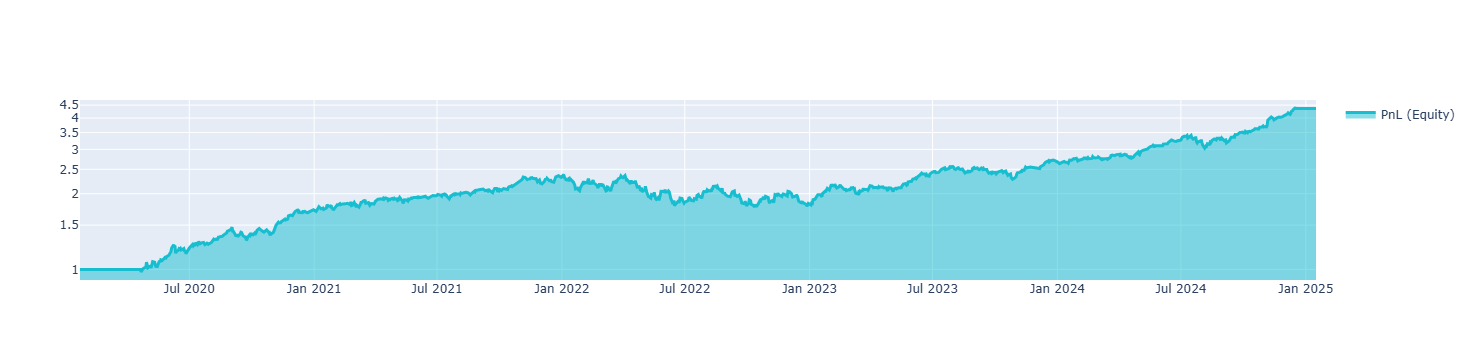

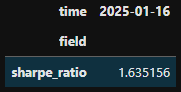

#4- Changing target classes
From
```python
    class_positive = 1 # prices goes up
    class_negative = 0 # price goes down
```

To
```python
    class_positive = 1 # prices goes up more than 0.1%
    class_neutral = 0 # prices goes up or down less than 0.1%
    class_negative = -1 # price goes down more than 0.1%
```

New targets needed to be defined to accommodate for the changes; now they'll be defined whether prices change for more or less than 0.1% or not. If the change is as significant, a 1 or -1 value is placed, otherwise, it stays at 0.
```python
def get_target_classes(data):
    """ Target classes for predicting if price goes up or down for more than 0.1%"""

    daily_return = qnta.change(data.sel(field="close"))/(data.sel(field="close"))
    daily_return_future = daily_return.shift(time=-1)

    move = 0.001
    
    class_positive = 1 # prices goes up more than 0.1%
    class_neutral = 0 # prices goes up or down less than 0.1%
    class_negative = -1 # price goes down more than 0.1%

    target_price = xr.where(daily_return_future < -move, class_negative, daily_return_future)
    target_price = xr.where(target_price > move, class_positive, target_price)
    target_price = xr.where(abs(target_price) != 1, class_neutral, target_price)

    return target_price
```

#5- Getting Liquid Asset values: Only trade liquid assets
For this, the "is_liquid" attribute has been retrieved from the dataset. Such attribute is multiplied with the weights from the assets to make sure only liquid assets are processed.

```python
# Extracts liquid field to only trade liquid assets
is_liquid = stock_data.sel(field="is_liquid")

# Gets weights
weights = xr.zeros_like(stock_data.sel(field="close"))

# Gets only liquid weights
weights = xr.zeros_like(weights * is_liquid)
```

## Sharpe Ratio after all the modifications
These are the results after the modifications proposed on January 20 session.

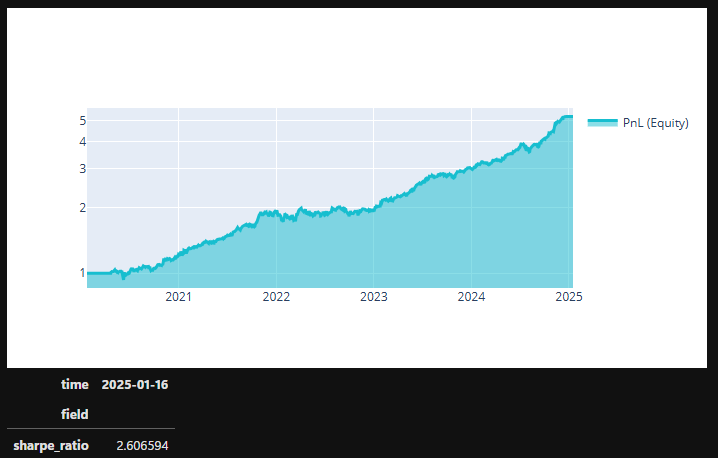

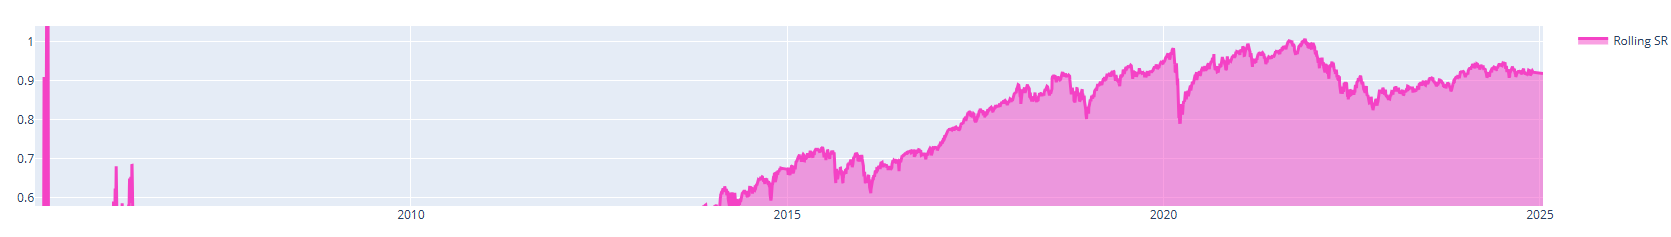

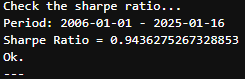